In [1]:
## classification algo

import pandas as pd
import numpy as np
import os
import pickle
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import auc,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix

/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from num

In [2]:
######################  functions #########################

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
file_location='/home/user'  #'C:\\Users\\Desktop\\data\\pickled_data'
os.chdir('/home/user')  #'C:\\Users\\Desktop\\data\\pickled_data') 

In [4]:
# remove xls for 2nd night of subject 13, as there was data loss 
# read in all xls, & then the sheets


#filename = "dfull_4001_4021.pkl" #C:\\Users\\Desktop\\data\\pickled_data\\SC4001E0-PSG.pickle"
#with open(filename, 'rb') as f:
#    dfull = pickle.load(f)

dfull = pickle.load(open('dfull_4001_4021.pkl', 'rb'))
dfull.head(2)

,pat_id,day,segment,epoch,delta,theta,alpha,beta,gamma,class
0,400,1,Seg1,1,0.392867,0.108826,0.087451,0.347723,0.267716,wake
1,400,1,Seg1,2,0.503258,0.003963,0.318405,0.166885,0.087134,wake


In [5]:
dfull.groupby('class').agg({'delta': 'count'})


,delta
class,
sleep_stage_1,41200
sleep_stage_2,239000
wake,946900


In [6]:
dfull.dtypes

pat_id      object
day         object
segment     object
epoch       object
delta      float64
theta      float64
alpha      float64
beta       float64
gamma      float64
class       object
dtype: object

In [8]:
## convert selected columns to categories 
dfull[['class']] = dfull[['class']].astype('str') 
#dfull[['class']] = dfull[['class']].astype('category')   ## this gave error

In [9]:
## create train-test data
X = dfull[['delta','theta','alpha','beta','gamma']]
y = dfull[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape


(981680, 5)

In [10]:
## fit model - vary ML algo & hyperparameters
model_svc = SVC()  # kernel='linear'
model_svc.fit(X_train_scaled, y_train)


/home/intern_eyecare/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# predict on test data - check metrics
y_pred = model_svc.predict(X_test_scaled)

Confusion matrix, without normalization
[[     0      0   8265]
 [     0      0  47689]
 [     0      0 189466]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


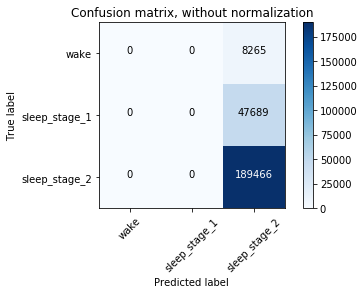

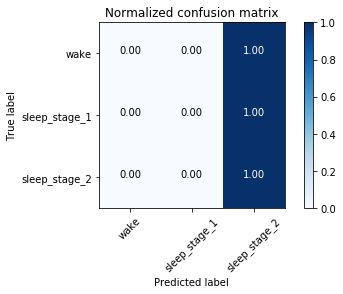

In [12]:
####    Compute confusion matrix     ####

class_names = ['wake','sleep_stage_1','sleep_stage_2']  # wake, SS1, SS2  ; # '0','1','2'

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix : normalisation shows nan for class'0' no signal has class=0 as true label
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

         wake       0.00      0.00      0.00      8265
sleep_stage_1       0.00      0.00      0.00     47689
sleep_stage_2       0.77      1.00      0.87    189466

  avg / total       0.60      0.77      0.67    245420



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
